# KMEANS AND KMEANS++

**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

1) Load the dataset and perform splitting into training and validation sets with 70:30 ratio.

> Do we need to normalise data? [If so Does it make any difference?]


Ans.
<br> PART 1:
a) Some algorithms are influenced by the scale of each independent variables: removing the difference between those scales (i.e. normalizing) might have a negative effect.For example, in k-means, the scale is an implicit weight. As a result, changing the measurement units may even lead one to see a very different clustering structure
<br>
b) Normalization is usualy not required on image data as the maximum and minimum values of all the columns is same therefore normalization won't make any changes to our original data.

PART 2:
Normalization is not required here as there is no skewness in the data as all the columns have values in the same range.

2) Implement the K Means & K-means++ algorithm. You need to find the optimal number of clusters using the
    elbow method and silhouette method. 

3) Define the initial clusters’ centroids using:</br>
> i) Forgy</br>

> ii) Random Partition

4) Experiment with different distance measures[Euclidean distance, Manhattan distance].

5) Plot the error vs number of clusters graph while using the elbow method and silhouette 
    method. Report the optimal number of clusters found.

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split # to split data into training sets and test sets
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from numpy.linalg import norm
import pandas as pd
from sklearn.metrics.cluster import homogeneity_score
import sys

In [3]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
x_l=[]

for x in train_x:
  x_l.append(x.flatten())
for x in test_x:
  x_l.append(x.flatten())

x_l=np.array(x_l)

y_l=[]

for y in train_y:
  y_l.append(y.flatten())
for y in test_y:
  y_l.append(y.flatten())

y_l=np.array(y_l)

x_train, x_test, y_train, y_test = train_test_split(x_l, y_l, test_size=0.1, random_state=42)

# print(x_train.shape)
# #print(train_x[0])

# print(x_test.shape)
# #print(test_x[0])

# print(y_train.shape)

# print(np.unique(y_train))

# print(y_test.shape)
# print(test_y[0])


In [5]:
def Euclidean_distance(v1,v2):  
    sum=0
    for p,q in zip(v1, v2):
      sum+=(float(p)- float(q))**2
    sum = sum ** .5
    return sum  

def Manhattan_distance(v1,v2):
  sum=0
  for p,q in zip(v1, v2):
    sum+=abs(float(p)- float(q))
  return sum

In [ ]:
# 1. Kmeans algorithm with Forgy as initial clusters’ centroids with Euclidean Distance

class Kmeans1:

  def __init__(self,k):
    self.k = k
    self.epoch = 90
    self.random_state = 122

  def compute_centroids(self, X, labels):
        centroids = np.zeros((self.k, X.shape[1]))
        for key in range(self.k):
            centroids[key, :] = np.mean(X[labels == key, :], axis=0)
        return centroids

  def compute_distance(self, X, centroids):
      distance = np.zeros((X.shape[0], self.k)) # 2d matrx=ix of 70000*k meaning every row has distance with each centroid
      for i in range(len(centroids)):
        for j in range(len(X)):
          distance[i][i]= Euclidean_distance(centroids[i],X[j])
      return distance

  def compute_distance1(self, X, centroids):
        distance = np.zeros((X.shape[0], self.k))
        for key in range(self.k):
            row_norm = norm(X - centroids[key, :], axis=1)
            distance[:, key] = np.square(row_norm)
        return distance
  
  def calc_centroids(self,labels, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(labels, columns=['labels'])], axis=1)
    for c in set(new_df['labels']):
        current_labels = new_df[new_df['labels'] == c][new_df.columns[:-1]]
        new_centroids.append(current_labels.mean(axis=0))
    return np.array(new_centroids)

  def fit(self, X):
      self.X=X
      np.random.RandomState(122)
      print()
      self.centroids = X[np.random.permutation(X.shape[0])[:self.k]]
      #print("****************")
      #print(self.centroids.shape)
      # print(self.centroids)
      
      for i in range(self.epoch):
        self.labels=[]
        self.old_centroids = self.centroids
        #distance1 = self.compute_distance(X[:10], old_centroids)
        distance2 = self.compute_distance1(X, self.old_centroids)
        #print(distance2)
        for j in distance2:
          min_ele=np.min(j)
          result = np.where(j == min_ele)
          self.labels.append(result[0][0])
        
        # c = np.zeros((self.k, X.shape[1]))
        # for key in range(self.k):
        #   li=np.where(self.labels==key)
        #   for l in li:
        #     for p in range(len(X[l])):
        #       c[key][p]=c[key][p]+X[l][p]
        #   c[key,:] = c[key,:]/len(li)
      
        self.centroids=self.calc_centroids(self.labels,X)

        if np.all(self.old_centroids == self.centroids):
          return self.centroids,self.labels
          break
      return self.centroids , self.labels
    
  def predict(self, X):
    #print(self.centroids)
    distance = self.compute_distance1(X, self.centroids)
    #print(distance)
    self.new_labels=[]
    for j in distance:
      min_ele=np.min(j)
      result = np.where(j == min_ele)
      #print(result)
      self.new_labels.append(result[0][0])
    return self.new_labels
  
  def error(self):
    error = self.compute_sse()
    return error


#implement elbow method from scratch
def elbow1():
  
  sse = []
  list_k = list(range(5, 15))
  for k in list_k:
    print("k=",end=" ")
    print(k,end =" Homogeneity Score: ")

    obj=Kmeans1(k)
    centroids,labels = obj.fit(x_train)
    #print(y_train.shape)
    #print(len(labels))
    print(homogeneity_score(np.squeeze(y_train),labels))
    cost=0.0
    for i in range(len(x_train)):
      temp=Euclidean_distance(x_train[i],centroids[labels[i]])
      cost+=temp
    sse.append(float(cost))
    #print(cost)
    del obj
    del centroids
    del labels
    del cost
    del temp
    
  print(sse)
  plt.figure(figsize=(6, 6))
  plt.plot(list_k, sse, '-o')
  plt.xlabel(r'Number of clusters *k*')
  plt.ylabel('Elbow score with euclidean');

k= 5 Homogeneity Score: 
0.35644250092543467
k= 6 Homogeneity Score: 
0.42677644197268616
k= 7 Homogeneity Score: 
0.43578861258038953
k= 8 Homogeneity Score: 
0.46861333068923366
k= 9 Homogeneity Score: 
0.4760946628916169
k= 10 Homogeneity Score: 
0.5185286611579639
k= 11 Homogeneity Score: 
0.5103428729890886
k= 12 Homogeneity Score: 
0.5316953774313932
k= 13 Homogeneity Score: 
0.5513233539927705
k= 14 Homogeneity Score: 
0.5613943235766657
[98071984.5908077, 96102922.77705336, 94690350.31265843, 91245221.96662189, 89783044.06911378, 88600305.80063525, 87324806.05221438, 86800193.73600122, 85060911.55840126, 84603255.53018007]


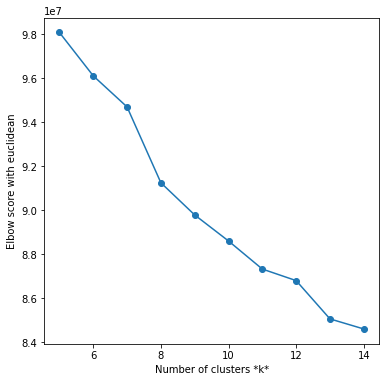

In [ ]:
elbow1()

The optimal number of clusters from Kmeans algorithm with Forgy as initial clusters’ centroids with Euclidean Distance : K=13

In [ ]:
# 2. Kmeans algorithm with Forgy as initial clusters’ centroids with Manhattan Distance

class Kmeans2:

  def __init__(self,k):
    self.k = k
    self.epoch = 90
    self.random_state = 122

  def compute_centroids(self, X, labels):
        centroids = np.zeros((self.k, X.shape[1]))
        for key in range(self.k):
            centroids[key, :] = np.mean(X[labels == key, :], axis=0)
        return centroids

  def compute_distance(self, X, centroids):
      distance = np.zeros((X.shape[0], self.k)) # 2d matrx=ix of 70000*k meaning every row has distance with each centroid
      for i in range(len(centroids)):
        for j in range(len(X)):
          distance[i][i]= Manhattan_distance(centroids[i],X[j])
      return distance

  def compute_distance1(self, X, centroids):
        distance = np.zeros((X.shape[0], self.k))
        for key in range(self.k):
            row_norm = norm(X - centroids[key, :], axis=1)
            distance[:, key] = np.square(row_norm)
        return distance
  
  def calc_centroids(self,labels, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(labels, columns=['labels'])], axis=1)
    for c in set(new_df['labels']):
        current_labels = new_df[new_df['labels'] == c][new_df.columns[:-1]]
        new_centroids.append(current_labels.mean(axis=0))
    return np.array(new_centroids)

  def fit(self, X):
      self.X=X
      np.random.RandomState(122)
      print()
      self.centroids = X[np.random.permutation(X.shape[0])[:self.k]]
      #print("****************")
      #print(self.centroids.shape)
      # print(self.centroids)
      
      for i in range(self.epoch):
        self.labels=[]
        self.old_centroids = self.centroids
        #distance1 = self.compute_distance(X[:10], old_centroids)
        distance2 = self.compute_distance1(X, self.old_centroids)
        #print(distance2)
        for j in distance2:
          min_ele=np.min(j)
          result = np.where(j == min_ele)
          self.labels.append(result[0][0])
        
        # c = np.zeros((self.k, X.shape[1]))
        # for key in range(self.k):
        #   li=np.where(self.labels==key)
        #   for l in li:
        #     for p in range(len(X[l])):
        #       c[key][p]=c[key][p]+X[l][p]
        #   c[key,:] = c[key,:]/len(li)
      
        self.centroids=self.calc_centroids(self.labels,X)

        if np.all(self.old_centroids == self.centroids):
          return self.centroids,self.labels
          break
      return self.centroids , self.labels
    
  def predict(self, X):
    #print(self.centroids)
    distance = self.compute_distance1(X, self.centroids)
    #print(distance)
    self.new_labels=[]
    for j in distance:
      min_ele=np.min(j)
      result = np.where(j == min_ele)
      #print(result)
      self.new_labels.append(result[0][0])
    return self.new_labels
  
  def error(self):
    error = self.compute_sse()
    return error


#implement elbow method from scratch
def elbow2(): #kmeans
  
  sse = []
  list_k = list(range(5, 15))
  for k in list_k:
    print("Homogenity Score for k=",end=" ")
    print(k,end=" ")
    obj=Kmeans2(k)
    centroids,labels = obj.fit(x_train)
    #print(y_train.shape)
    #print(len(labels))
    print(homogeneity_score(np.squeeze(y_train),labels))
    cost=0.0
    for i in range(len(x_train)):
      temp=Manhattan_distance(x_train[i],centroids[labels[i]])
      cost+=temp
    sse.append(float(cost))
    #print(cost)
    del obj
    del centroids
    del labels
    del cost
    del temp
    
  print(sse)
  plt.figure(figsize=(6, 6))
  plt.plot(list_k, sse, '-o')
  plt.xlabel(r'Number of clusters *k*')
  plt.ylabel('Elbow Score with Manhattan Dist');

Homogenity Score for k= 5 
0.3713345813946177
Homogenity Score for k= 6 
0.42236018378599793
Homogenity Score for k= 7 
0.41622457628385423
Homogenity Score for k= 8 
0.48931267548738616
Homogenity Score for k= 9 
0.49166184206177577
Homogenity Score for k= 10 
0.5189459302536649
Homogenity Score for k= 11 
0.5084817213084825
Homogenity Score for k= 12 
0.5249627322589902
Homogenity Score for k= 13 
0.5373349185872477
Homogenity Score for k= 14 
0.5665942963340286
[1881159145.7136245, 1789322638.9293015, 1779387740.5738406, 1716197842.4660711, 1660401543.079702, 1616061464.88614, 1579695335.6360784, 1563697533.3342109, 1535673207.4235466, 1497486791.6209607]


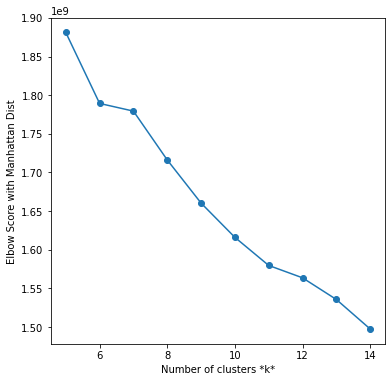

In [ ]:
elbow2()

The optimal number of clusters for Kmeans algorithm with Forgy as initial clusters’ centroids with Manhattan Distance : k=11

In [ ]:
# 3. Kmeans algorithm with Random Partition as initial clusters’ centroids with Euclidean Distance

class Kmeans3:

  def __init__(self,k):
    self.k = k
    self.epoch = 90
    self.random_state = 122

  def compute_centroids(self, X, labels):
        centroids = np.zeros((self.k, X.shape[1]))
        for key in range(self.k):
            centroids[key, :] = np.mean(X[labels == key, :], axis=0)
        return centroids

  def compute_distance(self, X, centroids):
      distance = np.zeros((X.shape[0], self.k)) # 2d matrx=ix of 70000*k meaning every row has distance with each centroid
      for i in range(len(centroids)):
        for j in range(len(X)):
          distance[i][i]= Euclidean_distance(centroids[i],X[j])
      return distance

  def compute_distance1(self, X, centroids):
        distance = np.zeros((X.shape[0], self.k))
        for key in range(self.k):
            row_norm = norm(X - centroids[key, :], axis=1)
            distance[:, key] = np.square(row_norm)
        return distance
  
  def calc_centroids(self,labels, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(labels, columns=['labels'])], axis=1)
    for c in set(new_df['labels']):
        current_labels = new_df[new_df['labels'] == c][new_df.columns[:-1]]
        new_centroids.append(current_labels.mean(axis=0))
    return np.array(new_centroids)

  def fit(self, X):
      self.X=X
      np.random.RandomState(122)
      print()
      #self.centroids = X[np.random.permutation(X.shape[0])[:self.k]]
      indices = np.random.choice(range(0,self.k), replace = True, size = self.X.shape[0])
      mean = []
      for count in range(self.k):
          mean.append(X[indices == count].mean(axis=0))
          
      self.centroids= np.concatenate([val[ None, :] for val in mean], axis = 0)

      #print("****************")
      #print(self.centroids.shape)
      # print(self.centroids)
      
      for i in range(self.epoch):
        self.labels=[]
        self.old_centroids = self.centroids
        #distance1 = self.compute_distance(X[:10], old_centroids)
        distance2 = self.compute_distance1(X, self.old_centroids)
        #print(distance2)
        for j in distance2:
          min_ele=np.min(j)
          result = np.where(j == min_ele)
          self.labels.append(result[0][0])
        
        # c = np.zeros((self.k, X.shape[1]))
        # for key in range(self.k):
        #   li=np.where(self.labels==key)
        #   for l in li:
        #     for p in range(len(X[l])):
        #       c[key][p]=c[key][p]+X[l][p]
        #   c[key,:] = c[key,:]/len(li)
      
        self.centroids=self.calc_centroids(self.labels,X)

        if np.all(self.old_centroids == self.centroids):
          return self.centroids,self.labels
          break
      return self.centroids , self.labels
    
  def predict(self, X):
    #print(self.centroids)
    distance = self.compute_distance1(X, self.centroids)
    #print(distance)
    self.new_labels=[]
    for j in distance:
      min_ele=np.min(j)
      result = np.where(j == min_ele)
      #print(result)
      self.new_labels.append(result[0][0])
    return self.new_labels
  
  def error(self):
    error = self.compute_sse()
    return error


#implement elbow method from scratch
def elbow3(): #kmeans
  
  sse = []
  list_k = list(range(5, 15))
  for k in list_k:
    print("k=",end=" ")
    print(k,end =" Homogeneity Score: ")
    obj=Kmeans3(k)
    centroids,labels = obj.fit(x_train)
    #print(y_train.shape)
    #print(len(labels))
    print(homogeneity_score(np.squeeze(y_train),labels))
    cost=0.0
    for i in range(len(x_train)):
      temp=Euclidean_distance(x_train[i],centroids[labels[i]])
      cost+=temp
    sse.append(float(cost))
    #print(cost)
    del obj
    del centroids
    del labels
    del cost
    del temp
    
  print(sse)
  plt.figure(figsize=(6, 6))
  plt.plot(list_k, sse, '-o')
  plt.xlabel(r'Number of clusters *k*')
  plt.ylabel('Elbow score with euclidean dist');

k= 5 Homogeneity Score: 
0.3706721781514885
k= 6 Homogeneity Score: 
0.4265644617245628
k= 7 Homogeneity Score: 
0.47894195028583
k= 8 Homogeneity Score: 
0.48998741508879473
k= 9 Homogeneity Score: 
0.4948954906887299
k= 10 Homogeneity Score: 
0.5188906343548882
k= 11 Homogeneity Score: 
0.5254031575837342
k= 12 Homogeneity Score: 
0.5459254450474184
k= 13 Homogeneity Score: 
0.551258844863086
k= 14 Homogeneity Score: 
0.5857961670084927
[98060755.29607524, 96103789.5085273, 92614188.83283955, 91212950.522557, 89713598.79205829, 88508842.48076716, 87456502.9194187, 86377271.02205715, 85060489.65841427, 84159250.03742704]


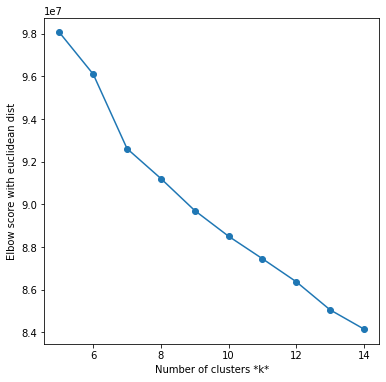

In [ ]:
elbow3()

The optimal k for Kmeans algorithm with Random Partition as initial clusters’ centroids with Euclidean Distance : k=13

In [ ]:
# 4. Kmeans algorithm with Random Partitioning as initial clusters’ centroids with Manhattan Distance

class Kmeans4:

  def __init__(self,k):
    self.k = k
    self.epoch = 90
    self.random_state = 122

  def compute_centroids(self, X, labels):
        centroids = np.zeros((self.k, X.shape[1]))
        for key in range(self.k):
            centroids[key, :] = np.mean(X[labels == key, :], axis=0)
        return centroids

  def compute_distance(self, X, centroids):
      distance = np.zeros((X.shape[0], self.k)) # 2d matrx=ix of 70000*k meaning every row has distance with each centroid
      for i in range(len(centroids)):
        for j in range(len(X)):
          distance[i][i]= Manhattan_distance(centroids[i],X[j])
      return distance

  def compute_distance1(self, X, centroids):
        distance = np.zeros((X.shape[0], self.k))
        for key in range(self.k):
            row_norm = norm(X - centroids[key, :], axis=1)
            distance[:, key] = np.square(row_norm)
        return distance
  
  def nearest_
  def calc_centroids(self,labels, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(labels, columns=['labels'])], axis=1)
    for c in set(new_df['labels']):
        current_labels = new_df[new_df['labels'] == c][new_df.columns[:-1]]
        new_centroids.append(current_labels.mean(axis=0))
    return np.array(new_centroids)

  def fit(self, X):
      self.X=X
      np.random.RandomState(122)
      print()
      #self.centroids = X[np.random.permutation(X.shape[0])[:self.k]]
      #print("****************")
      #print(self.centroids.shape)
      # print(self.centroids)
      indices = np.random.choice(range(0,self.k), replace = True, size = self.X.shape[0])
      mean = []
      for count in range(self.k):
          mean.append(X[indices == count].mean(axis=0))
          
      self.centroids= np.concatenate([val[ None, :] for val in mean], axis = 0)

      for i in range(self.epoch):
        self.labels=[]
        self.old_centroids = self.centroids
        #distance1 = self.compute_distance(X[:10], old_centroids)
        distance2 = self.compute_distance1(X, self.old_centroids)
        #print(distance2)
        for j in distance2:
          min_ele=np.min(j)
          result = np.where(j == min_ele)
          self.labels.append(result[0][0])
        
        # c = np.zeros((self.k, X.shape[1]))
        # for key in range(self.k):
        #   li=np.where(self.labels==key)
        #   for l in li:
        #     for p in range(len(X[l])):
        #       c[key][p]=c[key][p]+X[l][p]
        #   c[key,:] = c[key,:]/len(li)
      
        self.centroids=self.calc_centroids(self.labels,X)

        if np.all(self.old_centroids == self.centroids):
          return self.centroids,self.labels
          break
      return self.centroids , self.labels
    
  def predict(self, X):
    #print(self.centroids)
    distance = self.compute_distance1(X, self.centroids)
    #print(distance)
    self.new_labels=[]
    for j in distance:
      min_ele=np.min(j)
      result = np.where(j == min_ele)
      #print(result)
      self.new_labels.append(result[0][0])
    return self.new_labels
  
  def error(self):
    error = self.compute_sse()
    return error


#implement elbow method from scratch
def elbow4():
  
  sse = []
  list_k = list(range(5, 15))
  for k in list_k:
    print("Homogenity Score for k=",end=" ")
    print(k,end=" ")
    obj=Kmeans4(k)
    centroids,labels = obj.fit(x_train)
    #print(y_train.shape)
    #print(len(labels))
    print(homogeneity_score(np.squeeze(y_train),labels))
    cost=0.0
    for i in range(len(x_train)):
      temp=Manhattan_distance(x_train[i],centroids[labels[i]])
      cost+=temp
    sse.append(float(cost))
    #print(cost)
    del obj
    del centroids
    del labels
    del cost
    del temp
    
  print(sse)
  plt.figure(figsize=(6, 6))
  plt.plot(list_k, sse, '-o')
  plt.xlabel(r'Number of clusters *k*')
  plt.ylabel('Elbow Score with manhattan dist');

Homogenity Score for k= 5 
0.3778169552379457
Homogenity Score for k= 6 
0.42236018378599793
Homogenity Score for k= 7 
0.4420662112165433
Homogenity Score for k= 8 
0.47512053132018567
Homogenity Score for k= 9 
0.47613745551078074
Homogenity Score for k= 10 
0.5185315551264945
Homogenity Score for k= 11 
0.5440771784496173
Homogenity Score for k= 12 
0.5246012130958547
Homogenity Score for k= 13 
0.5507414955252112
Homogenity Score for k= 14 
0.568944340133489
[1943402389.4610496, 1789322638.9293015, 1745009281.6512604, 1685314873.631742, 1650056329.3582518, 1612624053.717416, 1583033652.8021123, 1551284890.1455877, 1522465647.6294475, 1501267661.1612194]


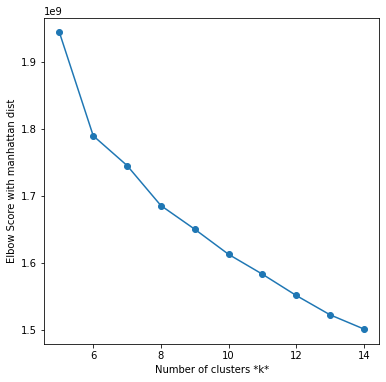

In [ ]:
elbow4()

The optimal k for Kmeans algorithm with Random Partitioning as initial clusters’ centroids with Manhattan Distance : k=12

In [12]:
# 5. Kmeans++ algorithm with Euclidean Distance

class Kmeansplusplus1:
  def __init__(self,k):
    self.k=k
    self.epoch=90
  
  def initial_centroid(self,X):
    self.centroids = [] 
    self.centroids.append(X[np.random.randint( X.shape[0]), :]) 
    for c_id in range(self.k - 1): 
        dist = [] 
        for i in range(X.shape[0]): 
            point = X[i, :] 
            d = sys.maxsize 
            for j in range(len(self.centroids)): 
                temp_dist = Euclidean_distance(point, self.centroids[j]) 
                d = min(d, temp_dist) 
            dist.append(d) 
        dist = np.array(dist) 
        next_centroid = X[np.argmax(dist), :] 
        self.centroids.append(next_centroid) 
    return self.centroids 

  def calc_dist(self,X):
    self.dist=[]
    for i in range(X.shape[0]):
      d=[]
      for j in range(len(self.centroids)):
        d.append(Euclidean_distance(X[i] , self.centroids[j]))
      self.dist.append(d)
      d=[]
    return self.dist

  def second_nearest_cluster(self):
    self.labels2=[]
    for i in self.dist:
      result = i.index(sorted(i)[1])
      self.labels2.append(result)
    return self.labels2

  def compute_distance1(self, X, centroids):
        centroids=np.array(centroids)
        distance = np.zeros((X.shape[0], self.k))
        for key in range(self.k):
            row_norm = norm(X - centroids[key,:] , axis=1)
            distance[:, key] = np.square(row_norm)
        return distance
        
  def calc_centroids(self,labels, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(labels, columns=['labels'])], axis=1)
    for c in set(new_df['labels']):
        current_labels = new_df[new_df['labels'] == c][new_df.columns[:-1]]
        new_centroids.append(current_labels.mean(axis=0))
    return new_centroids

  def train_centroids(self,X,centroids):
    self.centroids=centroids
    for i in range(self.epoch):
        self.labels1=[]
        self.old_centroids = self.centroids
        #print("***************")
        #print(self.old_centroids)
        distance2 = self.compute_distance1(X, self.old_centroids)
        for j in distance2:
          min_ele=np.min(j)
          result = np.where(j == min_ele)
          self.labels1.append(result[0][0])
        
        self.centroids=self.calc_centroids(self.labels1,X)

        #if np.all(self.old_centroids == self.centroids):
          #return self.centroids,self.labels1
          #break
    return self.centroids , self.labels1
 

 #implement elbow method from scratch
def elbow5(X): #kmeans++
  sse = []
  list_k = list(range(5, 15))
  #list_k=[7]
  for k in list_k:
    print("k=",end=" ")
    print(k,end =" Homogeneity Score: ")
    obj=Kmeansplusplus1(k)
    centroids=obj.initial_centroid(X)
    #print(len(centroids))
    #print(len(centroids[0]))
    centroids,labels1=obj.train_centroids(X,centroids)
    #print(centroids.shape)
    dist=obj.calc_dist(X)
    label2=obj.second_nearest_cluster()

    print(homogeneity_score(np.squeeze(y_test),labels1))
    cost=0.0
    for i in range(len(X)):
      temp=Euclidean_distance(X[i],centroids[labels1[i]])
      cost+=temp
    sse.append(float(cost))
    #print(cost)
    del obj
    del centroids
    del labels1
    del dist
    del label2
    del cost
    del temp
    
  print(sse)
  plt.figure(figsize=(6, 6))
  plt.plot(list_k, sse, '-o')
  plt.xlabel(r'Number of clusters *k*')
  plt.ylabel('Elbow Score with euclidean dist');

k= 5 Homogeneity Score: 0.31460798876215096
k= 6 Homogeneity Score: 0.27300970535125446
k= 7 Homogeneity Score: 0.32345475263759216
k= 8 Homogeneity Score: 0.40020632269004885
k= 9 Homogeneity Score: 0.34973219059353117
k= 10 Homogeneity Score: 0.30545732952186555
k= 11 Homogeneity Score: 0.41534054665824394
k= 12 Homogeneity Score: 0.39414799880934764
k= 13 Homogeneity Score: 0.3961911726894886
k= 14 Homogeneity Score: 0.37570450275707884
[11415096.48915442, 11473901.735877937, 10872213.941953389, 10465240.768764947, 10513702.087887207, 10936487.106885824, 10224353.071338808, 10350127.270538086, 10377149.027743118, 10494998.319395041]


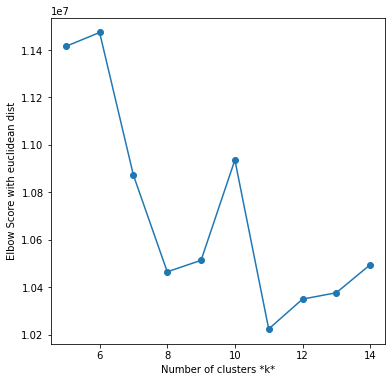

In [ ]:
elbow5(x_test)

Optimal k for Kmeans++ algorithm with Euclidean Distance for elbow: k=13

In [8]:
# 6. Kmeans++ algorithm with Manhattan_distance with elbow

class Kmeansplusplus2:
  def __init__(self,k):
    self.k=k
    self.epoch=2
  
  def initial_centroid(self,X):
    self.centroids = [] 
    self.centroids.append(X[np.random.randint( X.shape[0]), :]) 
    for c_id in range(self.k - 1): 
        dist = [] 
        for i in range(X.shape[0]): 
            point = X[i, :] 
            d = sys.maxsize 
            for j in range(len(self.centroids)): 
                temp_dist = Manhattan_distance(point, self.centroids[j]) 
                d = min(d, temp_dist) 
            dist.append(d) 
        dist = np.array(dist) 
        next_centroid = X[np.argmax(dist), :] 
        self.centroids.append(next_centroid) 
    return self.centroids 

  def calc_dist(self,X):
    self.dist=[]
    for i in range(X.shape[0]):
      d=[]
      for j in range(len(self.centroids)):
        d.append(Manhattan_distance(X[i] , self.centroids[j]))
      self.dist.append(d)
      d=[]
    return self.dist

  def second_nearest_cluster(self):
    self.labels2=[]
    for i in self.dist:
      result = i.index(sorted(i)[1])
      self.labels2.append(result)
    return self.labels2

  def compute_distance1(self, X, centroids):
        centroids=np.array(centroids)
        distance = np.zeros((X.shape[0], self.k))
        for key in range(self.k):
            row_norm = norm(X - centroids[key,:] , axis=1)
            distance[:, key] = np.square(row_norm)
        return distance
        
  def calc_centroids(self,labels, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(labels, columns=['labels'])], axis=1)
    for c in set(new_df['labels']):
        current_labels = new_df[new_df['labels'] == c][new_df.columns[:-1]]
        new_centroids.append(current_labels.mean(axis=0))
    return new_centroids

  def train_centroids(self,X,centroids):
    self.centroids=centroids
    for i in range(self.epoch):
        self.labels1=[]
        self.old_centroids = self.centroids
        #print("***************")
        #print(self.old_centroids)
        distance2 = self.compute_distance1(X, self.old_centroids)
        for j in distance2:
          min_ele=np.min(j)
          result = np.where(j == min_ele)
          self.labels1.append(result[0][0])
        
        self.centroids=self.calc_centroids(self.labels1,X)

        #if np.all(self.old_centroids == self.centroids):
          #return self.centroids,self.labels1
          #break
    return self.centroids , self.labels1
 

 #implement elbow method from scratch
def elbow6(X): #kmeans++
  sse = []
  list_k = list(range(5, 15))
  #list_k=[7]
  for k in list_k:
    print("k=",end=" ")
    print(k,end =" Homogeneity Score: ")
    
    obj=Kmeansplusplus2(k)
    centroids=obj.initial_centroid(X)
    #print(len(centroids))
    #print(len(centroids[0]))
    centroids,labels1=obj.train_centroids(X,centroids)
    #print(centroids.shape)
    dist=obj.calc_dist(X)
    label2=obj.second_nearest_cluster()

    print(homogeneity_score(np.squeeze(y_test),labels1))
    cost=0.0
    for i in range(len(X)):
      temp=Manhattan_distance(X[i],centroids[labels1[i]])
      cost+=temp
    sse.append(float(cost))
    #print(cost)
    del obj
    del centroids
    del labels1
    del dist
    del label2
    del cost
    del temp
    
  print(sse)
  plt.figure(figsize=(6, 6))
  plt.plot(list_k, sse, '-o')
  plt.xlabel(r'Number of clusters *k*')
  plt.ylabel('Elbow score with manhattan');




k= 5 Homogeneity Score: 0.18200994345613353
k= 6 Homogeneity Score: 0.3701145757618918
k= 7 Homogeneity Score: 0.36732837646138233
k= 8 Homogeneity Score: 0.3380954311503582
k= 9 Homogeneity Score: 0.39049658045671837
k= 10 Homogeneity Score: 0.42874051284980036
k= 11 Homogeneity Score: 0.3942256272338468
k= 12 Homogeneity Score: 0.42360254086307103
k= 13 Homogeneity Score: 0.3743964285435551
k= 14 Homogeneity Score: 0.4065597472841552
[246361580.36061692, 211185498.32167, 206584798.89261863, 208142362.99874213, 196669596.55456224, 191445406.68807888, 196182452.14844656, 192079293.5210059, 199078284.8452176, 193530372.17358586]


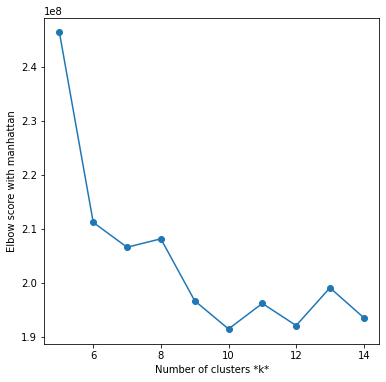

In [9]:
elbow6(x_test)

The optimal k for Kmeans++ algorithm with Manhattan_distance with elbow : k=10

In [64]:
# 7. Kmeans++ algorithm with Euclidean Distance - silhouette
class Kmeansplusplus1:
  def __init__(self,k):
    self.k=k
    self.epoch=90
  
  def initial_centroid(self,X):
    self.centroids = [] 
    self.centroids.append(X[np.random.randint( X.shape[0]), :]) 
    for c_id in range(self.k - 1): 
        dist = [] 
        for i in range(X.shape[0]): 
            point = X[i, :] 
            d = sys.maxsize 
            for j in range(len(self.centroids)): 
                temp_dist = Euclidean_distance(point, self.centroids[j]) 
                d = min(d, temp_dist) 
            dist.append(d) 
        dist = np.array(dist) 
        next_centroid = X[np.argmax(dist), :] 
        self.centroids.append(next_centroid) 
    return self.centroids 

  def calc_dist(self,X):
    self.dist=[]
    for i in range(X.shape[0]):
      d=[]
      for j in range(len(self.centroids)):
        d.append(Euclidean_distance(X[i] , self.centroids[j]))
      self.dist.append(d)
      d=[]
    return self.dist

  def second_nearest_cluster(self):
    self.labels2=[]
    for i in self.dist:
      result = i.index(sorted(i)[1])
      self.labels2.append(result)
    return self.labels2

  def compute_distance1(self, X, centroids):
        centroids=np.array(centroids)
        distance = np.zeros((X.shape[0], self.k))
        for key in range(self.k):
            row_norm = norm(X - centroids[key,:] , axis=1)
            distance[:, key] = np.square(row_norm)
        return distance
        
  def calc_centroids(self,labels, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(labels, columns=['labels'])], axis=1)
    for c in set(new_df['labels']):
        current_labels = new_df[new_df['labels'] == c][new_df.columns[:-1]]
        new_centroids.append(current_labels.mean(axis=0))
    return new_centroids

  def train_centroids(self,X,centroids):
    self.centroids=centroids
    for i in range(self.epoch):
        self.labels1=[]
        self.old_centroids = self.centroids
        #print("***************")
        #print(self.old_centroids)
        distance2 = self.compute_distance1(X, self.old_centroids)
        for j in distance2:
          min_ele=np.min(j)
          result = np.where(j == min_ele)
          self.labels1.append(result[0][0])
        
        self.centroids=self.calc_centroids(self.labels1,X)

        #if np.all(self.old_centroids == self.centroids):
          #return self.centroids,self.labels1
          #break
    return self.centroids , self.labels1

def silhouette(X): #for kmeans1++
  silhouette = []
  list_k = list(range(5, 15))
  for k in list_k:
    print("k=",end=" ")
    print(k)
    
    obj=Kmeansplusplus1(k)
    centroids=obj.initial_centroid(X)
    centroids,labels1=obj.train_centroids(X,centroids)
    dist=obj.calc_dist(X) 
    label2=obj.second_nearest_cluster()
    #labels1=labels1.to_list()
    sse1=0
    for pt in range(len(X)):
      a=0
      b=0
      cluster_index=labels1[pt]
      #print("cluster index:",end=" ")
      #print(cluster_index)
      points_idx=[]
      for abc in range(len(labels1)):
        if labels1[abc]==cluster_index:
          points_idx.append(abc)
      for p in points_idx:
        xx=pd.Series(X[pt])
        yy=pd.Series(X[p])
        #print(type(xx))
        #print(type(yy))
        a = a + Euclidean_distance(xx,yy)
      a=a/len(points_idx)

      cluster2_index=label2[pt]
      points_idx=[]
      for abc in range(len(labels1)):
        if labels1[abc]==cluster2_index:
          points_idx.append(abc)

      for p in points_idx:
        xx=pd.Series(X[pt])
        yy=pd.Series(X[p])
        b = b + Euclidean_distance(xx,yy)
      b=b/len(points_idx)
      sil_coeff=(b-a)/max(a,b)
      sse1+= sil_coeff
    sse1=sse1/len(X)
    print(sse1)
    silhouette.append(sse1)

  plt.figure(figsize=(6, 6))
  plt.plot(list_k, silhouette, '-o')
  plt.xlabel(r'Number of clusters *k*')
  plt.ylabel('Silhouette Distance');

k= 5
0.16754246870262102
k= 6
0.14580543302759696
k= 7
0.17462060212854894
k= 8
0.17511392169859982
k= 9
0.1666231395605513
k= 10
0.1508389091498108
k= 11
0.1534786284802324
k= 12
0.17337791902996408
k= 13
0.15711738528604435
k= 14
0.14776966011757048


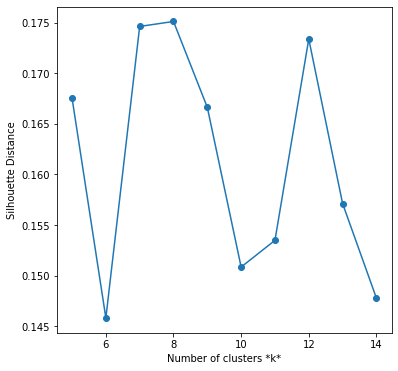

In [65]:
# 7th kmeans++ with silhouette
silhouette(x_test)


The optimal k for Kmeans++ algorithm with Euclidean Distance - silhouette : k=8 or k=12

In [36]:
# 8. Kmeans algorithm with Forgy as initial clusters’ centroids with Euclidean Distance : Silhouette
class Kmeans8:

  def __init__(self,k):
    self.k = k
    self.epoch = 90
    self.random_state = 122
    self.labels=[]
    self.label2=[]

  def compute_centroids(self, X, labels):
        centroids = np.zeros((self.k, X.shape[1]))
        for key in range(self.k):
            centroids[key, :] = np.mean(X[labels == key, :], axis=0)
        return centroids

  def compute_distance(self, X, centroids):
      distance = np.zeros((X.shape[0], self.k)) # 2d matrx=ix of 70000*k meaning every row has distance with each centroid
      for i in range(len(centroids)):
        for j in range(len(X)):
          distance[i][i]= Euclidean_distance(centroids[i],X[j])
      return distance

  def compute_distance1(self, X, centroids):
        distance = np.zeros((X.shape[0], self.k))
        for key in range(self.k):
            row_norm = norm(X - centroids[key, :], axis=1)
            distance[:, key] = np.square(row_norm)
        return distance
  
  def calc_centroids(self,labels, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(labels, columns=['labels'])], axis=1)
    for c in set(new_df['labels']):
        current_labels = new_df[new_df['labels'] == c][new_df.columns[:-1]]
        new_centroids.append(current_labels.mean(axis=0))
    return np.array(new_centroids)

  def fit(self, X):
      self.X=X
      np.random.RandomState(122)
      print()
      self.centroids = X[np.random.permutation(X.shape[0])[:self.k]]
      #print("****************")
      #print(self.centroids.shape)
      # print(self.centroids)
      
      for i in range(self.epoch):
        self.labels=[]
        self.label2=[]
        self.old_centroids = self.centroids
        #distance1 = self.compute_distance(X[:10], old_centroids)
        distance2 = self.compute_distance1(X, self.old_centroids)
        #print(distance2)
        for j in distance2:
          min_ele=np.min(j)
          result = np.where(j == min_ele)
          self.labels.append(result[0][0])
          self.label2.append(j.tolist().index(sorted(j)[1]))
        # c = np.zeros((self.k, X.shape[1]))
        # for key in range(self.k):
        #   li=np.where(self.labels==key)
        #   for l in li:
        #     for p in range(len(X[l])):
        #       c[key][p]=c[key][p]+X[l][p]
        #   c[key,:] = c[key,:]/len(li)
      
        self.centroids=self.calc_centroids(self.labels,X)

        if np.all(self.old_centroids == self.centroids):
          return self.centroids,self.labels, self.label2
          break
      return self.centroids , self.labels, self.label2
    
  def predict(self, X):
    #print(self.centroids)
    distance = self.compute_distance1(X, self.centroids)
    #print(distance)
    self.new_labels=[]
    for j in distance:
      min_ele=np.min(j)
      result = np.where(j == min_ele)
      #print(result)
      self.new_labels.append(result[0][0])
    return self.new_labels
  
  def error(self):
    error = self.compute_sse()
    return error


def silhouette8(X): #for kmeans
  silhouette = []
  list_k = list(range(5, 15))
  for k in list_k:
    print("k=",end=" ")
    print(k)
    
    obj=Kmeans8(k)
    centroids,labels1,label2 = obj.fit(X)

    #labels1=labels1.to_list()
    sse1=0
    for pt in range(len(X)):
      a=0
      b=0
      cluster_index=labels1[pt]
      #print("cluster index:",end=" ")
      #print(cluster_index)
      points_idx=[]
      for abc in range(len(labels1)):
        if labels1[abc]==cluster_index:
          points_idx.append(abc)
      for p in points_idx:
        xx=pd.Series(X[pt])
        yy=pd.Series(X[p])
        #print(type(xx))
        #print(type(yy))
        a = a + Euclidean_distance(xx,yy)
      a=a/len(points_idx)

      cluster2_index=label2[pt]
      points_idx=[]
      for abc in range(len(labels1)):
        if labels1[abc]==cluster2_index:
          points_idx.append(abc)

      for p in points_idx:
        xx=pd.Series(X[pt])
        yy=pd.Series(X[p])
        b = b + Euclidean_distance(xx,yy)
      b=b/len(points_idx)
      sil_coeff=(b-a)/max(a,b)
      sse1+= sil_coeff
    sse1=sse1/len(X)
    print(sse1)
    silhouette.append(sse1)

  plt.figure(figsize=(6, 6))
  plt.plot(list_k, silhouette, '-o')
  plt.xlabel(r'Number of clusters *k*')
  plt.ylabel('Silhouette Distance');

k= 5

0.1687649141560256
k= 6

0.16852338177793205
k= 7

0.16398368889928233
k= 8

0.16672425038863012
k= 9

0.13990323432289317
k= 10

0.15493714535430658
k= 11

0.14764674512146822
k= 12

0.1462508403835588
k= 13

0.14536811463676347
k= 14

0.14313850118662214


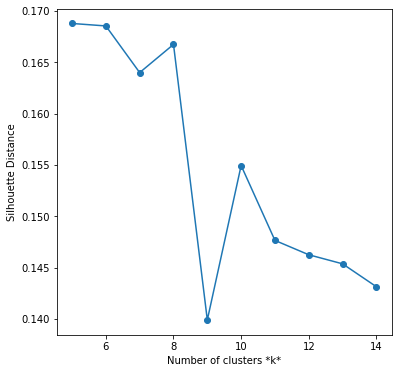

In [38]:
silhouette8(x_test)

The optimal k for Kmeans algorithm with Forgy as initial clusters’ centroids with Euclidean Distance : Silhouette : k=8

In [39]:
# 9. Kmeans++ algorithm with Manhattan_distance - silhouette

class Kmeansplusplus4:
  def __init__(self,k):
    self.k=k
    self.epoch=90
  
  def initial_centroid(self,X):
    self.centroids = [] 
    self.centroids.append(X[np.random.randint( X.shape[0]), :]) 
    for c_id in range(self.k - 1): 
        dist = [] 
        for i in range(X.shape[0]): 
            point = X[i, :] 
            d = sys.maxsize 
            for j in range(len(self.centroids)): 
                temp_dist = Manhattan_distance(point, self.centroids[j]) 
                d = min(d, temp_dist) 
            dist.append(d) 
        dist = np.array(dist) 
        next_centroid = X[np.argmax(dist), :] 
        self.centroids.append(next_centroid) 
    return self.centroids 

  def calc_dist(self,X):
    self.dist=[]
    for i in range(X.shape[0]):
      d=[]
      for j in range(len(self.centroids)):
        d.append(Manhattan_distance(X[i] , self.centroids[j]))
      self.dist.append(d)
      d=[]
    return self.dist

  def second_nearest_cluster(self):
    self.labels2=[]
    for i in self.dist:
      result = i.index(sorted(i)[1])
      self.labels2.append(result)
    return self.labels2

  def compute_distance1(self, X, centroids):
        centroids=np.array(centroids)
        distance = np.zeros((X.shape[0], self.k))
        for key in range(self.k):
            row_norm = norm(X - centroids[key,:] , axis=1)
            distance[:, key] = np.square(row_norm)
        return distance
        
  def calc_centroids(self,labels, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(labels, columns=['labels'])], axis=1)
    for c in set(new_df['labels']):
        current_labels = new_df[new_df['labels'] == c][new_df.columns[:-1]]
        new_centroids.append(current_labels.mean(axis=0))
    return new_centroids

  def train_centroids(self,X,centroids):
    self.centroids=centroids
    for i in range(self.epoch):
        self.labels1=[]
        self.old_centroids = self.centroids
        #print("***************")
        #print(self.old_centroids)
        distance2 = self.compute_distance1(X, self.old_centroids)
        for j in distance2:
          min_ele=np.min(j)
          result = np.where(j == min_ele)
          self.labels1.append(result[0][0])
        
        self.centroids=self.calc_centroids(self.labels1,X)

        #if np.all(self.old_centroids == self.centroids):
          #return self.centroids,self.labels1
          #break
    return self.centroids , self.labels1

def silhouette(X): #for kmeans1++
  silhouette = []
  list_k = list(range(5, 15))
  for k in list_k:
    print("k=",end=" ")
    print(k)
    
    obj=Kmeansplusplus4(k)
    centroids=obj.initial_centroid(X)
    centroids,labels1=obj.train_centroids(X,centroids)
    dist=obj.calc_dist(X) 
    label2=obj.second_nearest_cluster()
    #labels1=labels1.to_list()
    sse1=0
    for pt in range(len(X)):
      a=0
      b=0
      cluster_index=labels1[pt]
      #print("cluster index:",end=" ")
      #print(cluster_index)
      points_idx=[]
      for abc in range(len(labels1)):
        if labels1[abc]==cluster_index:
          points_idx.append(abc)
      for p in points_idx:
        xx=pd.Series(X[pt])
        yy=pd.Series(X[p])
        #print(type(xx))
        #print(type(yy))
        a = a + Euclidean_distance(xx,yy)
      a=a/len(points_idx)

      cluster2_index=label2[pt]
      points_idx=[]
      for abc in range(len(labels1)):
        if labels1[abc]==cluster2_index:
          points_idx.append(abc)

      for p in points_idx:
        xx=pd.Series(X[pt])
        yy=pd.Series(X[p])
        b = b + Euclidean_distance(xx,yy)
      b=b/len(points_idx)
      sil_coeff=(b-a)/max(a,b)
      sse1+= sil_coeff
    sse1=sse1/len(X)
    print(sse1)
    silhouette.append(sse1)

  plt.figure(figsize=(6, 6))
  plt.plot(list_k, silhouette, '-o')
  plt.xlabel(r'Number of clusters *k*')
  plt.ylabel('Silhouette Distance');


k= 5
0.23556175605776308
k= 6
0.23952205874400895
k= 7
0.2624360193217898
k= 8
0.24344131401528316
k= 9
0.28485603051189107
k= 10
0.30180313818749827
k= 11
0.3243501572615891
k= 12
0.339873566262845
k= 13
0.2875343019573284
k= 14
0.3030965714788555


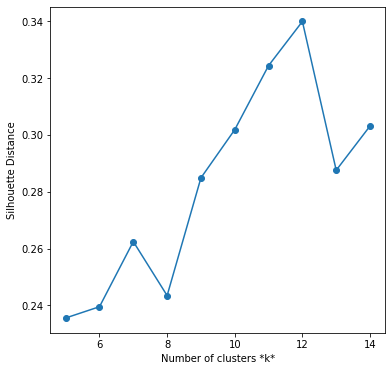

In [40]:
silhouette(x_test)

The optimal k for Kmeans++ algorithm with Manhattan_distance - silhouette: k=12

In [41]:
#10. Kmeans algorithm with Random Partitioning as initial clusters’ centroids with Manhattan Distance – silhouette

class Kmeans10:

  def __init__(self,k):
    self.k = k
    self.epoch = 90
    self.random_state = 122
    self.labels=[]
    self.label2=[]

  def compute_centroids(self, X, labels):
        centroids = np.zeros((self.k, X.shape[1]))
        for key in range(self.k):
            centroids[key, :] = np.mean(X[labels == key, :], axis=0)
        return centroids

  def compute_distance(self, X, centroids):
      distance = np.zeros((X.shape[0], self.k)) # 2d matrx=ix of 70000*k meaning every row has distance with each centroid
      for i in range(len(centroids)):
        for j in range(len(X)):
          distance[i][i]= Manhattan_distance(centroids[i],X[j])
      return distance

  def compute_distance1(self, X, centroids):
        distance = np.zeros((X.shape[0], self.k))
        for key in range(self.k):
            row_norm = norm(X - centroids[key, :], axis=1)
            distance[:, key] = np.square(row_norm)
        return distance
  
  def calc_centroids(self,labels, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(labels, columns=['labels'])], axis=1)
    for c in set(new_df['labels']):
        current_labels = new_df[new_df['labels'] == c][new_df.columns[:-1]]
        new_centroids.append(current_labels.mean(axis=0))
    return np.array(new_centroids)

  def fit(self, X):
      self.X=X
      np.random.RandomState(122)
      print()
      #self.centroids = X[np.random.permutation(X.shape[0])[:self.k]]
      #print("****************")
      #print(self.centroids.shape)
      # print(self.centroids)
      indices = np.random.choice(range(0,self.k), replace = True, size = self.X.shape[0])
      mean = []
      for count in range(self.k):
          mean.append(X[indices == count].mean(axis=0))
          
      self.centroids= np.concatenate([val[ None, :] for val in mean], axis = 0)

      for i in range(self.epoch):
        self.labels=[]
        self.label2=[]
        self.old_centroids = self.centroids
        #distance1 = self.compute_distance(X[:10], old_centroids)
        distance2 = self.compute_distance1(X, self.old_centroids)
        #print(distance2)
        for j in distance2:
          min_ele=np.min(j)
          result = np.where(j == min_ele)
          self.labels.append(result[0][0])
          self.label2.append(j.tolist().index(sorted(j)[1]))
        # c = np.zeros((self.k, X.shape[1]))
        # for key in range(self.k):
        #   li=np.where(self.labels==key)
        #   for l in li:
        #     for p in range(len(X[l])):
        #       c[key][p]=c[key][p]+X[l][p]
        #   c[key,:] = c[key,:]/len(li)
      
        self.centroids=self.calc_centroids(self.labels,X)

        if np.all(self.old_centroids == self.centroids):
          return self.centroids,self.labels, self.label2
          break
      return self.centroids , self.labels, self.label2
    
  def predict(self, X):
    #print(self.centroids)
    distance = self.compute_distance1(X, self.centroids)
    #print(distance)
    self.new_labels=[]
    for j in distance:
      min_ele=np.min(j)
      result = np.where(j == min_ele)
      #print(result)
      self.new_labels.append(result[0][0])
    return self.new_labels
  
  def error(self):
    error = self.compute_sse()
    return error


def silhouette10(X): #for kmeans
  silhouette = []
  list_k = list(range(5, 15))
  for k in list_k:
    print("k=",end=" ")
    print(k)
    
    obj=Kmeans8(k)
    centroids,labels1,label2 = obj.fit(X)

    #labels1=labels1.to_list()
    sse1=0
    for pt in range(len(X)):
      a=0
      b=0
      cluster_index=labels1[pt]
      #print("cluster index:",end=" ")
      #print(cluster_index)
      points_idx=[]
      for abc in range(len(labels1)):
        if labels1[abc]==cluster_index:
          points_idx.append(abc)
      for p in points_idx:
        xx=pd.Series(X[pt])
        yy=pd.Series(X[p])
        #print(type(xx))
        #print(type(yy))
        a = a + Manhattan_distance(xx,yy)
      a=a/len(points_idx)

      cluster2_index=label2[pt]
      points_idx=[]
      for abc in range(len(labels1)):
        if labels1[abc]==cluster2_index:
          points_idx.append(abc)

      for p in points_idx:
        xx=pd.Series(X[pt])
        yy=pd.Series(X[p])
        b = b + Manhattan_distance(xx,yy)
      b=b/len(points_idx)
      sil_coeff=(b-a)/max(a,b)
      sse1+= sil_coeff
    sse1=sse1/len(X)
    print(sse1)
    silhouette.append(sse1)

  plt.figure(figsize=(6, 6))
  plt.plot(list_k, silhouette, '-o')
  plt.xlabel(r'Number of clusters *k*')
  plt.ylabel('Silhouette Distance');

k= 5

0.2790794848192812
k= 6

0.29014770396392664
k= 7

0.24288761250942084
k= 8

0.22572229867577895
k= 9

0.2730097890712932
k= 10

0.25443333140865687
k= 11

0.24793404432288602
k= 12

0.25325043775434286
k= 13

0.24819110313201068
k= 14

0.26084196847752017


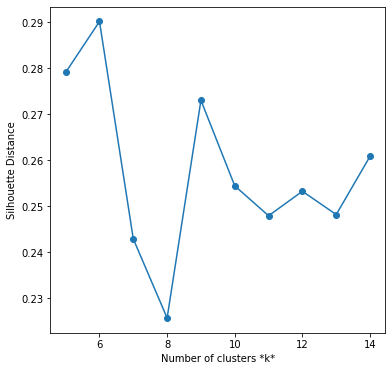

In [42]:
silhouette10(x_test)

The optimal k for Kmeans algorithm with Random Partitioning as initial clusters’ centroids with Manhattan Distance – silhouette : k=9

In [61]:
#11. Kmeans algorithm with Random Partition as initial clusters’ centroids with Euclidean Distance – Silhoutte

class Kmeans11:

  def __init__(self,k):
    self.k = k
    self.epoch = 90
    self.random_state = 122
    self.labels=[]
    self.label2=[]

  def compute_centroids(self, X, labels):
        centroids = np.zeros((self.k, X.shape[1]))
        for key in range(self.k):
            centroids[key, :] = np.mean(X[labels == key, :], axis=0)
        return centroids

  def compute_distance(self, X, centroids):
      distance = np.zeros((X.shape[0], self.k)) # 2d matrx=ix of 70000*k meaning every row has distance with each centroid
      for i in range(len(centroids)):
        for j in range(len(X)):
          distance[i][i]= Euclidean_distance(centroids[i],X[j])
      return distance

  def compute_distance1(self, X, centroids):
        distance = np.zeros((X.shape[0], self.k))
        for key in range(self.k):
            row_norm = norm(X - centroids[key, :], axis=1)
            distance[:, key] = np.square(row_norm)
        return distance
  
  def calc_centroids(self,labels, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(labels, columns=['labels'])], axis=1)
    for c in set(new_df['labels']):
        current_labels = new_df[new_df['labels'] == c][new_df.columns[:-1]]
        new_centroids.append(current_labels.mean(axis=0))
    return np.array(new_centroids)

  def fit(self, X):
      self.X=X
      np.random.RandomState(122)
      #print()
      #self.centroids = X[np.random.permutation(X.shape[0])[:self.k]]
      #print("****************")
      #print(self.centroids.shape)
      # print(self.centroids)
      indices = np.random.choice(range(0,self.k -1), replace = True, size = self.X.shape[0])
      mean = []
      for count in range(self.k):
          mean.append(X[indices == count].mean(axis=0))
          
      self.centroids= np.concatenate([val[ None, :] for val in mean], axis = 0)

      for i in range(self.epoch):
        self.labels=[]
        self.label2=[]
        self.old_centroids = self.centroids
        #distance1 = self.compute_distance(X[:10], old_centroids)
        distance2 = self.compute_distance1(X, self.old_centroids)
        #print(distance2)
        for j in distance2:
          min_ele=np.min(j)
          result = np.where(j == min_ele)
          self.labels.append(result[0])
          self.label2.append(j.tolist().index(sorted(j)[1]))
        # c = np.zeros((self.k, X.shape[1]))
        # for key in range(self.k):
        #   li=np.where(self.labels==key)
        #   for l in li:
        #     for p in range(len(X[l])):
        #       c[key][p]=c[key][p]+X[l][p]
        #   c[key,:] = c[key,:]/len(li)
      
        self.centroids=self.calc_centroids(self.labels,X)

        if np.all(self.old_centroids == self.centroids):
          return self.centroids,self.labels, self.label2
          break
      return self.centroids , self.labels, self.label2
    
  def predict(self, X):
    #print(self.centroids)
    distance = self.compute_distance1(X, self.centroids)
    #print(distance)
    self.new_labels=[]
    for j in distance:
      min_ele=np.min(j)
      result = np.where(j == min_ele)
      #print(result)
      self.new_labels.append(result[0][0])
    return self.new_labels
  
  def error(self):
    error = self.compute_sse()
    return error


def silhouette11(X): #for kmeans
  silhouette = []
  list_k = list(range(5, 11))
  for k in list_k:
    print("k=",end=" ")
    print(k)
    
    obj=Kmeans11(k)
    centroids,labels1,label2 = obj.fit(X)

    #labels1=labels1.to_list()
    sse1=0
    for pt in range(len(X)):
      a=0
      b=0
      cluster_index=labels1[pt]
      #print("cluster index:",end=" ")
      #print(cluster_index)
      points_idx=[]
      for abc in range(len(labels1)):
        if labels1[abc]==cluster_index:
          points_idx.append(abc)
      for p in points_idx:
        xx=pd.Series(X[pt])
        yy=pd.Series(X[p])
        #print(type(xx))
        #print(type(yy))
        a = a + Euclidean_distance(xx,yy)
      a=a/len(points_idx)

      cluster2_index=label2[pt]
      points_idx=[]
      for abc in range(len(labels1)):
        if labels1[abc]==cluster2_index:
          points_idx.append(abc)

      for p in points_idx:
        xx=pd.Series(X[pt])
        yy=pd.Series(X[p])
        b = b + Euclidean_distance(xx,yy)
      b=b/len(points_idx)
      sil_coeff=(b-a)/max(a,b)
      sse1+= sil_coeff
    sse1=sse1/len(X)
    print(sse1)
    silhouette.append(sse1)

  plt.figure(figsize=(6, 6))
  plt.plot(list_k, silhouette, '-o')
  plt.xlabel(r'Number of clusters *k*')
  plt.ylabel('Silhouette Distance');

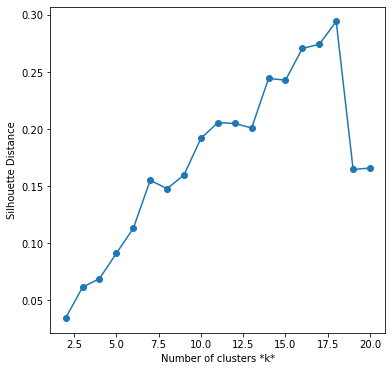

In [67]:
silhouette11(x_test)

The optimal k for Kmeans algorithm with Random Partition as initial clusters’ centroids with Euclidean Distance – Silhoutte : k=17

In [57]:
#12.  Kmeans algorithm with Forgy as initial clusters’ centroids with Manhattan Distance - Silhoutte

class Kmeans12:

  def __init__(self,k):
    self.k = k
    self.epoch = 90
    self.random_state = 122
    self.labels=[]
    self.label2=[]

  def compute_centroids(self, X, labels):
        centroids = np.zeros((self.k, X.shape[1]))
        for key in range(self.k):
            centroids[key, :] = np.mean(X[labels == key, :], axis=0)
        return centroids

  def compute_distance(self, X, centroids):
      distance = np.zeros((X.shape[0], self.k)) # 2d matrx=ix of 70000*k meaning every row has distance with each centroid
      for i in range(len(centroids)):
        for j in range(len(X)):
          distance[i][i]= Manhattan_distance(centroids[i],X[j])
      return distance

  def compute_distance1(self, X, centroids):
        distance = np.zeros((X.shape[0], self.k))
        for key in range(self.k):
            row_norm = norm(X - centroids[key, :], axis=1)
            distance[:, key] = np.square(row_norm)
        return distance
  
  def calc_centroids(self,labels, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(labels, columns=['labels'])], axis=1)
    for c in set(new_df['labels']):
        current_labels = new_df[new_df['labels'] == c][new_df.columns[:-1]]
        new_centroids.append(current_labels.mean(axis=0))
    return np.array(new_centroids)

  def fit(self, X):
      self.X=X
      np.random.RandomState(122)
      print()
      self.centroids = X[np.random.permutation(X.shape[0])[:self.k]]
      #print("****************")
      #print(self.centroids.shape)
      # print(self.centroids)
      
      for i in range(self.epoch):
        self.labels=[]
        self.label2=[]
        self.old_centroids = self.centroids
        #distance1 = self.compute_distance(X[:10], old_centroids)
        distance2 = self.compute_distance1(X, self.old_centroids)
        #print(distance2)
        for j in distance2:
          min_ele=np.min(j)
          result = np.where(j == min_ele)
          self.labels.append(result[0][0])
          self.label2.append(j.tolist().index(sorted(j)[1]))
        # c = np.zeros((self.k, X.shape[1]))
        # for key in range(self.k):
        #   li=np.where(self.labels==key)
        #   for l in li:
        #     for p in range(len(X[l])):
        #       c[key][p]=c[key][p]+X[l][p]
        #   c[key,:] = c[key,:]/len(li)
      
        self.centroids=self.calc_centroids(self.labels,X)

        if np.all(self.old_centroids == self.centroids):
          return self.centroids,self.labels, self.label2
          break
      return self.centroids , self.labels, self.label2
    
  def predict(self, X):
    #print(self.centroids)
    distance = self.compute_distance1(X, self.centroids)
    #print(distance)
    self.new_labels=[]
    for j in distance:
      min_ele=np.min(j)
      result = np.where(j == min_ele)
      #print(result)
      self.new_labels.append(result[0][0])
    return self.new_labels
  
  def error(self):
    error = self.compute_sse()
    return error


def silhouette12(X): #for kmeans
  silhouette = []
  list_k = list(range(5, 15))
  for k in list_k:
    print("k=",end=" ")
    print(k)
    
    obj=Kmeans8(k)
    centroids,labels1,label2 = obj.fit(X)

    #labels1=labels1.to_list()
    sse1=0
    for pt in range(len(X)):
      a=0
      b=0
      cluster_index=labels1[pt]
      #print("cluster index:",end=" ")
      #print(cluster_index)
      points_idx=[]
      for abc in range(len(labels1)):
        if labels1[abc]==cluster_index:
          points_idx.append(abc)
      for p in points_idx:
        xx=pd.Series(X[pt])
        yy=pd.Series(X[p])
        #print(type(xx))
        #print(type(yy))
        a = a + Manhattan_distance(xx,yy)
      a=a/len(points_idx)

      cluster2_index=label2[pt]
      points_idx=[]
      for abc in range(len(labels1)):
        if labels1[abc]==cluster2_index:
          points_idx.append(abc)

      for p in points_idx:
        xx=pd.Series(X[pt])
        yy=pd.Series(X[p])
        b = b + Manhattan_distance(xx,yy)
      b=b/len(points_idx)
      sil_coeff=(b-a)/max(a,b)
      sse1+= sil_coeff
    sse1=sse1/len(X)
    print(sse1)
    silhouette.append(sse1)

  plt.figure(figsize=(6, 6))
  plt.plot(list_k, silhouette, '-o')
  plt.xlabel(r'Number of clusters *k*')
  plt.ylabel('Silhouette Distance');

k= 5

0.19551376179836166
k= 6

0.22519747661554015
k= 7

0.23067909314113696
k= 8

0.2145150932229864
k= 9

0.230429281795398
k= 10

0.20111466810950043
k= 11

0.19524339154378031
k= 12

0.20321171588593112
k= 13

0.2086466484883026
k= 14

0.17916332528638604


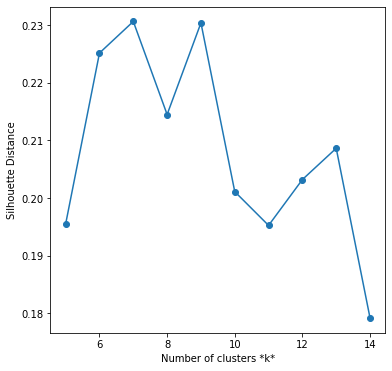

In [58]:
silhouette12(x_test)

The optimal k for Kmeans algorithm with Forgy as initial clusters’ centroids with Manhattan Distance - Silhoutte : k=9

6) Report the training and the validation accuracy and Compare your trained model with a model trained by the scikit-learn



a) The training & validation accuracy is calculated in every part above.


In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import homogeneity_score
import warnings
warnings.filterwarnings('ignore')

for i in range(20):
  km=KMeans(n_clusters=i+1, random_state=42).fit(x_train)
  clusters=km.labels_
  print("the homogeneity score for k={0} is ".format(i+1),homogeneity_score(y_train.flatten(),clusters))

the homogeneity score for k=1 is  1.4497463971619185e-16
the homogeneity score for k=2 is  0.1088167937971938
the homogeneity score for k=3 is  0.23331767313934967
the homogeneity score for k=4 is  0.31055438154200893
the homogeneity score for k=5 is  0.3843342526920181
the homogeneity score for k=6 is  0.4247708734291836
the homogeneity score for k=7 is  0.4631663123606289
the homogeneity score for k=8 is  0.5139710506229429
the homogeneity score for k=9 is  0.514815117334776
the homogeneity score for k=10 is  0.5312538372831244
the homogeneity score for k=11 is  0.5742601189836939
the homogeneity score for k=12 is  0.553732594115303
the homogeneity score for k=13 is  0.5584329770013573
the homogeneity score for k=14 is  0.5837148702690793
the homogeneity score for k=15 is  0.5956422077791832
the homogeneity score for k=16 is  0.5810037850363586
the homogeneity score for k=17 is  0.6210107163273137
the homogeneity score for k=18 is  0.6196327274575948
the homogeneity score for k=19 is

**Part 2:**
</br>
In this task, you will perform operations on `[data.csv](https://drive.google.com/file/d/15NPkfXFoTkiRBlcI4ffe_Lp_BFOyf8UY/view?usp=sharing)`, data.csv is a  latent space representation of  Fashion-MNIST, before doing this task please read about latent space representation.

9) Load the data.csv file and apply Kmeans and Kmeans++, You need to find the optimal number of clusters using the elbow method and silhouette method. 

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder  #for label encoding
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
import pandas as pd
from sklearn.metrics.cluster import homogeneity_score
import sys

In [ ]:
#df=pd.read_csv("drive/MyDrive/data.csv")
#df.head()

data = pd.read_csv("drive/MyDrive/data.csv", na_values='?', header=None,) 
data = data.reset_index(drop=True)
y=data.iloc[:,-1]
df = data.iloc[:,1:-2]
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190
0,2.371966,5.534521,3.771174,1.877307,3.599094,5.784208,3.871398,2.878446,4.109515,5.151511,3.751897,3.556238,3.999945,4.033617,3.463554,0.815792,1.831954,2.790003,2.835154,2.847168,2.992328,2.124879,1.704721,3.592144,3.263506,1.407651,0.792772,2.504661,2.018912,0.874059,0.602102,0.853430,1.155075,1.530042,0.818970,0.941513,1.196730,1.848092,1.000364,0.101884,...,2.595528,1.199002,0.344221,1.873137,2.094620,1.129008,1.337368,1.837140,1.841307,0.778679,2.493860,3.410885,4.817075,1.915310,3.604270,5.053342,5.813587,3.742723,4.704520,5.645797,5.770760,4.435363,5.069113,5.619418,5.546394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.526383,3.173435,3.100720,4.561333,4.389340,3.113444,2.403284,4.039598,5.388708,3.305511,2.359617,4.038125,5.575717,3.339931,2.404248,0.994276,0.772501,1.164019,1.013916,0.000000,1.154526,1.538787,1.013898,0.628898,0.976963,1.260981,0.398027,0.915209,1.075993,0.952253,0.360992,2.014620,1.434731,1.451873,1.603072,2.144488,1.205181,0.529447,1.521376,1.463058,...,2.551724,0.522883,1.889491,2.350907,3.995306,0.000000,1.764494,2.500885,4.176400,4.328540,4.785938,4.613373,4.575105,4.120614,4.945362,5.024627,4.416818,3.742496,5.187605,5.475689,4.571706,3.445375,5.177875,5.506576,4.554773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.946491,2.014766,0.606742,1.302111,2.517385,1.538354,0.719057,1.375769,2.441072,1.504012,0.765164,1.472412,2.440190,1.520071,0.794750,0.462368,0.326227,0.021466,0.114557,0.467163,0.482730,0.345495,0.200275,0.497083,0.515072,0.348540,0.177527,0.530037,0.556105,0.371184,0.183986,0.756496,1.232142,1.138340,0.928109,0.767746,0.836496,0.508740,0.718285,0.730288,...,2.025097,0.000000,0.779589,1.328869,2.031063,0.000000,0.822838,1.308154,2.011046,1.308188,2.007667,2.612505,1.880480,1.288256,1.852298,2.421364,1.724892,1.318860,1.947480,2.432085,1.778601,1.372086,2.027474,2.441239,1.833839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.386448,1.852063,1.134460,2.596234,3.389648,1.662953,1.038565,2.676021,3.362122,1.920712,1.499901,3.161449,3.286839,2.157617,2.036724,0.000000,0.117205,0.143452,0.000000,0.461451,0.427643,0.255673,0.164487,0.876250,0.560381,0.436125,0.523286,1.043375,0.694227,0.512307,0.499009,1.551288,1.385397,0.882480,1.210409,1.346007,1.316480,0.673251,1.055087,1.016263,...,2.556800,0.000000,1.174302,1.990459,2.752038,0.216381,1.086999,1.898338,2.957911,2.406755,3.281940,3.422960,2.465468,2.262799,2.927118,3.108559,2.103831,1.763779,3.160302,3.302106,2.497695,1.768548,3.200631,3.456518,2.872745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.801409,3.549685,1.483723,3.400284,6.017810,3.560772,0.938271,3.958203,6.236764,3.570545,1.322847,4.797732,6.304609,3.528461,2.447520,0.443713,1.214100,0.773076,0.129588,0.767762,0.898237,0.355897,0.291968,1.390222,1.277721,0.606648,0.616740,1.489748,1.172309,0.477964,0.484417,1.798817,2.018017,1.576089,1.636996,1.743922,2.118833,1.429850,1.320268,1.335179,...,4.205501,0.000000,1.885727,4.131544,4.623601,0.000000,1.766280,3.891120,5.017716,3.414642,4.076665,5.282783,2.977127,3.245191,4.416250,5.385727,3.051950,3.147260,5.228606,5.652248,3.534677,3.436431,5.685542,5.855291,3.632308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#for i in range(1,175):
#  df[i]=df[i].astype(float)
#  df[i]=((df[i]-df[i].min())/(df[i].max()-df[i].min()))*1
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190
0,2.371966,5.534521,3.771174,1.877307,3.599094,5.784208,3.871398,2.878446,4.109515,5.151511,3.751897,3.556238,3.999945,4.033617,3.463554,0.815792,1.831954,2.790003,2.835154,2.847168,2.992328,2.124879,1.704721,3.592144,3.263506,1.407651,0.792772,2.504661,2.018912,0.874059,0.602102,0.853430,1.155075,1.530042,0.818970,0.941513,1.196730,1.848092,1.000364,0.101884,...,2.595528,1.199002,0.344221,1.873137,2.094620,1.129008,1.337368,1.837140,1.841307,0.778679,2.493860,3.410885,4.817075,1.915310,3.604270,5.053342,5.813587,3.742723,4.704520,5.645797,5.770760,4.435363,5.069113,5.619418,5.546394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.526383,3.173435,3.100720,4.561333,4.389340,3.113444,2.403284,4.039598,5.388708,3.305511,2.359617,4.038125,5.575717,3.339931,2.404248,0.994276,0.772501,1.164019,1.013916,0.000000,1.154526,1.538787,1.013898,0.628898,0.976963,1.260981,0.398027,0.915209,1.075993,0.952253,0.360992,2.014620,1.434731,1.451873,1.603072,2.144488,1.205181,0.529447,1.521376,1.463058,...,2.551724,0.522883,1.889491,2.350907,3.995306,0.000000,1.764494,2.500885,4.176400,4.328540,4.785938,4.613373,4.575105,4.120614,4.945362,5.024627,4.416818,3.742496,5.187605,5.475689,4.571706,3.445375,5.177875,5.506576,4.554773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.946491,2.014766,0.606742,1.302111,2.517385,1.538354,0.719057,1.375769,2.441072,1.504012,0.765164,1.472412,2.440190,1.520071,0.794750,0.462368,0.326227,0.021466,0.114557,0.467163,0.482730,0.345495,0.200275,0.497083,0.515072,0.348540,0.177527,0.530037,0.556105,0.371184,0.183986,0.756496,1.232142,1.138340,0.928109,0.767746,0.836496,0.508740,0.718285,0.730288,...,2.025097,0.000000,0.779589,1.328869,2.031063,0.000000,0.822838,1.308154,2.011046,1.308188,2.007667,2.612505,1.880480,1.288256,1.852298,2.421364,1.724892,1.318860,1.947480,2.432085,1.778601,1.372086,2.027474,2.441239,1.833839,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.386448,1.852063,1.134460,2.596234,3.389648,1.662953,1.038565,2.676021,3.362122,1.920712,1.499901,3.161449,3.286839,2.157617,2.036724,0.000000,0.117205,0.143452,0.000000,0.461451,0.427643,0.255673,0.164487,0.876250,0.560381,0.436125,0.523286,1.043375,0.694227,0.512307,0.499009,1.551288,1.385397,0.882480,1.210409,1.346007,1.316480,0.673251,1.055087,1.016263,...,2.556800,0.000000,1.174302,1.990459,2.752038,0.216381,1.086999,1.898338,2.957911,2.406755,3.281940,3.422960,2.465468,2.262799,2.927118,3.108559,2.103831,1.763779,3.160302,3.302106,2.497695,1.768548,3.200631,3.456518,2.872745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.801409,3.549685,1.483723,3.400284,6.017810,3.560772,0.938271,3.958203,6.236764,3.570545,1.322847,4.797732,6.304609,3.528461,2.447520,0.443713,1.214100,0.773076,0.129588,0.767762,0.898237,0.355897,0.291968,1.390222,1.277721,0.606648,0.616740,1.489748,1.172309,0.477964,0.484417,1.798817,2.018017,1.576089,1.636996,1.743922,2.118833,1.429850,1.320268,1.335179,...,4.205501,0.000000,1.885727,4.131544,4.623601,0.000000,1.766280,3.891120,5.017716,3.414642,4.076665,5.282783,2.977127,3.245191,4.416250,5.385727,3.051950,3.147260,5.228606,5.652248,3.534677,3.436431,5.685542,5.855291,3.632308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
##doing label encoding
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
y=labelencoder.fit_transform(y)
#print(y[:10])

x=df.to_numpy()
#print(x[0])

In [ ]:
print(type(y))
print(type(x))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
def Euclidean_distance(v1,v2):  
    sum=0
    for p,q in zip(v1, v2):
      sum+=(float(p)- float(q))**2
    sum = sum ** .5
    return sum  

In [ ]:
# 1. Kmeans algorithm with Forgy as initial clusters’ centroids with Euclidean Distance

class Kmeans1:

  def __init__(self,k):
    self.k = k
    self.epoch = 90
    self.random_state = 122

  def compute_centroids(self, X, labels):
        centroids = np.zeros((self.k, X.shape[1]))
        for key in range(self.k):
            centroids[key, :] = np.mean(X[labels == key, :], axis=0)
        return centroids

  def compute_distance(self, X, centroids):
      distance = np.zeros((X.shape[0], self.k)) # 2d matrx=ix of 70000*k meaning every row has distance with each centroid
      for i in range(len(centroids)):
        for j in range(len(X)):
          distance[i][i]= Euclidean_distance(centroids[i],X[j])
      return distance

  def compute_distance1(self, X, centroids):
        distance = np.zeros((X.shape[0], self.k))
        for key in range(self.k):
            row_norm = norm(X - centroids[key, :], axis=1)
            distance[:, key] = np.square(row_norm)
        return distance
  
  def calc_centroids(self,labels, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(labels, columns=['labels'])], axis=1)
    for c in set(new_df['labels']):
        current_labels = new_df[new_df['labels'] == c][new_df.columns[:-1]]
        new_centroids.append(current_labels.mean(axis=0))
    return np.array(new_centroids)

  def fit(self, X):
      self.X=X
      np.random.RandomState(122)
      print()
      self.centroids = X[np.random.permutation(X.shape[0])[:self.k]]
      #print("****************")
      #print(self.centroids.shape)
      # print(self.centroids)
      
      for i in range(self.epoch):
        self.labels=[]
        self.label2=[]
        self.old_centroids = self.centroids
        #distance1 = self.compute_distance(X[:10], old_centroids)
        distance2 = self.compute_distance1(X, self.old_centroids)
        #print(distance2)
        for j in distance2:
          min_ele=np.min(j)
          result = np.where(j == min_ele)
          self.labels.append(result[0][0])
          self.label2.append(j.tolist().index(sorted(j)[1]))
        # c = np.zeros((self.k, X.shape[1]))
        # for key in range(self.k):
        #   li=np.where(self.labels==key)
        #   for l in li:
        #     for p in range(len(X[l])):
        #       c[key][p]=c[key][p]+X[l][p]
        #   c[key,:] = c[key,:]/len(li)
      
        self.centroids=self.calc_centroids(self.labels,X)

        if np.all(self.old_centroids == self.centroids):
          return self.centroids,self.labels, self.label2
          break
      return self.centroids , self.labels, self.label2
        
  def predict(self, X):
    #print(self.centroids)
    distance = self.compute_distance1(X, self.centroids)
    #print(distance)
    self.new_labels=[]
    for j in distance:
      min_ele=np.min(j)
      result = np.where(j == min_ele)
      #print(result)
      self.new_labels.append(result)
    return self.new_labels
  
  def error(self):
    error = self.compute_sse()
    return error


#implement elbow method from scratch
def elbow1(xx,yy):
  
  sse = []
  list_k = list(range(5, 15))
  for k in list_k:
    print("k=",end=" ")
    print(k,end =" Homogeneity Score: ")

    obj=Kmeans1(k)
    centroids,labels,not_req = obj.fit(xx)
    #print(y_train.shape)
    # print("******************")
    # print(len(labels))
    # print(labels[0])
    new_labels=[]
    for val in labels:
      for value in val:
        new_labels.append(value)
    print(homogeneity_score(np.squeeze(yy),new_labels))
    cost=0.0
    for i in range(len(xx)):
      temp=Euclidean_distance(xx[i],centroids[new_labels[i]])
      cost+=temp
    sse.append(float(cost))
    #print(cost)
    del obj
    del centroids
    del labels
    del cost
    del temp
    
  print(sse)
  plt.figure(figsize=(6, 6))
  plt.plot(list_k, sse, '-o')
  plt.xlabel(r'Number of clusters *k*')
  plt.ylabel('Elbow score with euclidean');

k= 5 Homogeneity Score: 
0.3205653340320163
k= 6 Homogeneity Score: 
0.36850499179291357
k= 7 Homogeneity Score: 
0.41428790382560016
k= 8 Homogeneity Score: 
0.45168711851866455
k= 9 Homogeneity Score: 
0.4643289060006521
k= 10 Homogeneity Score: 
0.4897440660752845
k= 11 Homogeneity Score: 
0.47858983112788067
k= 12 Homogeneity Score: 
0.5043392315041522
k= 13 Homogeneity Score: 
0.5184737176780071
k= 14 Homogeneity Score: 
0.5011573616650739
[511577.17568465904, 481604.0373668253, 472724.7524538396, 442126.762015392, 433169.3790436621, 419785.7954304929, 410891.99579027656, 403830.8382499829, 398215.37023837713, 387559.375380335]


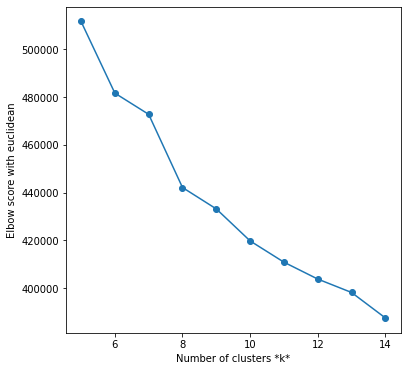

In [ ]:
elbow1(x,y)

The optimal number of clusters for Kmeans algorithm with Forgy as initial clusters’ centroids with Euclidean Distance as seen by Elbow Score Graph is k= 13

In [ ]:
def silhouette1(X): #for kmeans
  silhouette = []
  list_k = list(range(5, 15))
  for k in list_k:
    print("k=",end=" ")
    print(k)
    
    obj=Kmeans1(k)
    centroids,labels1,label2 = obj.fit(X)

    #labels1=labels1.to_list()
    sse1=0
    for pt in range(len(X)):
      a=0
      b=0
      cluster_index=labels1[pt]
      #print("cluster index:",end=" ")
      #print(cluster_index)
      points_idx=[]
      for abc in range(len(labels1)):
        if labels1[abc]==cluster_index:
          points_idx.append(abc)
      for p in points_idx:
        xx=pd.Series(X[pt])
        yy=pd.Series(X[p])
        #print(type(xx))
        #print(type(yy))
        a = a + Euclidean_distance(xx,yy)
      a=a/len(points_idx)

      cluster2_index=label2[pt]
      points_idx=[]
      for abc in range(len(labels1)):
        if labels1[abc]==cluster2_index:
          points_idx.append(abc)

      for p in points_idx:
        xx=pd.Series(X[pt])
        yy=pd.Series(X[p])
        b = b + Euclidean_distance(xx,yy)
      b=b/len(points_idx)
      sil_coeff=(b-a)/max(a,b)
      sse1+= sil_coeff
    sse1=sse1/len(X)
    print(sse1)
    silhouette.append(sse1)

  plt.figure(figsize=(6, 6))
  plt.plot(list_k, silhouette, '-o')
  plt.xlabel(r'Number of clusters *k*')
  plt.ylabel('Silhouette Distance');

k= 5

0.2672118952777017
k= 6

0.274179400826857
k= 7

0.29391899783428677
k= 8

0.2948001993592122
k= 9

0.2836652052306619
k= 10

0.2848901314905615
k= 11

0.2940349183487409
k= 12

0.2892802450094181
k= 13

0.28996389321385013
k= 14

0.31071700132510166


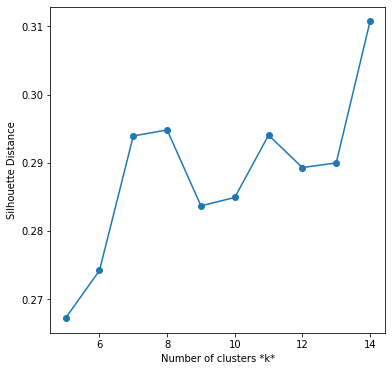

In [ ]:
silhouette1(x)

The optimal number of clusters for Kmeans algorithm with Forgy as initial clusters’ centroids with Euclidean Distance as seen by Silhouette Score Graph is k=8 or k=11

In [1]:
#Kmeans++ algorithm with Euclidean Distance

class Kmeansplusplus1:
  def __init__(self,k):
    self.k=k
    self.epoch=2
  
  def initial_centroid(self,X):
    self.centroids = [] 
    self.centroids.append(X[np.random.randint( X.shape[0]), :]) 
    for c_id in range(self.k - 1): 
        dist = [] 
        for i in range(X.shape[0]): 
            point = X[i, :] 
            d = sys.maxsize 
            for j in range(len(self.centroids)): 
                temp_dist = Euclidean_distance(point, self.centroids[j]) 
                d = min(d, temp_dist) 
            dist.append(d) 
        dist = np.array(dist) 
        next_centroid = X[np.argmax(dist), :] 
        self.centroids.append(next_centroid) 
    return self.centroids 

  def calc_dist(self,X):
    self.dist=[]
    for i in range(X.shape[0]):
      d=[]
      for j in range(len(self.centroids)):
        d.append(Euclidean_distance(X[i] , self.centroids[j]))
      self.dist.append(d)
      d=[]
    return self.dist

  def second_nearest_cluster(self):
    self.labels2=[]
    for i in self.dist:
      result = i.index(sorted(i)[1])
      self.labels2.append(result)
    return self.labels2

  def compute_distance1(self, X, centroids):
        centroids=np.array(centroids)
        distance = np.zeros((X.shape[0], self.k))
        for key in range(self.k):
            row_norm = norm(X - centroids[key,:] , axis=1)
            distance[:, key] = np.square(row_norm)
        return distance
        
  def calc_centroids(self,labels, X):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(labels, columns=['labels'])], axis=1)
    for c in set(new_df['labels']):
        current_labels = new_df[new_df['labels'] == c][new_df.columns[:-1]]
        new_centroids.append(current_labels.mean(axis=0))
    return new_centroids

  def train_centroids(self,X,centroids):
    self.centroids=centroids
    for i in range(self.epoch):
        self.labels1=[]
        self.old_centroids = self.centroids
        #print("***************")
        #print(self.old_centroids)
        distance2 = self.compute_distance1(X, self.old_centroids)
        for j in distance2:
          min_ele=np.min(j)
          result = np.where(j == min_ele)
          self.labels1.append(result[0])
        
        self.centroids=self.calc_centroids(self.labels1,X)

        #if np.all(self.old_centroids == self.centroids):
          #return self.centroids,self.labels1
          #break
    return self.centroids , self.labels1
 

 #implement elbow method from scratch
def elbow5(X): #kmeans++
  sse = []
  list_k = list(range(5, 15))
  #list_k=[7]
  for k in list_k:
    print("k=",end=" ")
    print(k,end =" Homogeneity Score: ")
    obj=Kmeansplusplus1(k)
    centroids=obj.initial_centroid(X)
    #print(len(centroids))
    #print(len(centroids[0]))
    centroids,labels1=obj.train_centroids(X,centroids)
    #print(centroids.shape)
    dist=obj.calc_dist(X)
    label2=obj.second_nearest_cluster()
    new_labels=[]
    for val in labels1:
      for value in val:
        new_labels.append(value)
    
    print(homogeneity_score(y,new_labels))
    cost=0.0
    for i in range(len(X)):
      temp=Euclidean_distance(X[i],centroids[new_labels[i]])
      cost+=temp
    sse.append(float(cost))
    #print(cost)
    del obj
    del centroids
    del labels1
    del dist
    del label2
    del cost
    del temp
    
  print(sse)
  plt.figure(figsize=(6, 6))
  plt.plot(list_k, sse, '-o')
  plt.xlabel(r'Number of clusters *k*')
  plt.ylabel('Elbow Score with euclidean dist');

k= 5 Homogeneity Score: 0.24654198732400942
k= 6 Homogeneity Score: 0.2723195006379487
k= 7 Homogeneity Score: 0.36273408842458915
k= 8 Homogeneity Score: 0.38881615431578553
k= 9 Homogeneity Score: 0.387524109575675
k= 10 Homogeneity Score: 0.41458934753354576
k= 11 Homogeneity Score: 0.40055076812898766
k= 12 Homogeneity Score: 0.4415700759676392
k= 13 Homogeneity Score: 0.39643284562872355
k= 14 Homogeneity Score: 0.42086160526258776
[551439.8926652385, 557160.4203616587, 484506.27385902876, 489487.5334293403, 469944.5298337359, 445550.983938624, 459629.31809957867, 432163.5093755788, 437028.852007846, 430533.90774205985]


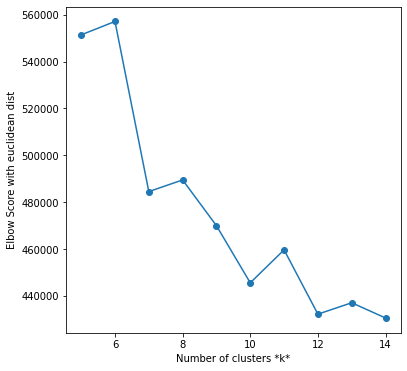

In [ ]:
elbow5(x)

The optimal number of clusters for Kmeans++ algorithm with Euclidean Distance as seen by Elbow Score Graph is k=

In [ ]:
def silhouette(X): #for kmeans1++
  silhouette = []
  list_k = list(range(5, 15))
  for k in list_k:
    print("k=",end=" ")
    print(k)
    
    obj=Kmeansplusplus1(k)
    centroids=obj.initial_centroid(X)
    centroids,labels1=obj.train_centroids(X,centroids)
    dist=obj.calc_dist(X) 
    label2=obj.second_nearest_cluster()
    #labels1=labels1.to_list()
    sse1=0
    for pt in range(len(X)):
      a=0
      b=0
      cluster_index=labels1[pt]
      #print("cluster index:",end=" ")
      #print(cluster_index)
      points_idx=[]
      for abc in range(len(labels1)):
        if labels1[abc]==cluster_index:
          points_idx.append(abc)
      for p in points_idx:
        xx=pd.Series(X[pt])
        yy=pd.Series(X[p])
        #print(type(xx))
        #print(type(yy))
        a = a + Euclidean_distance(xx,yy)
      a=a/len(points_idx)

      cluster2_index=label2[pt]
      points_idx=[]
      for abc in range(len(labels1)):
        if labels1[abc]==cluster2_index:
          points_idx.append(abc)

      for p in points_idx:
        xx=pd.Series(X[pt])
        yy=pd.Series(X[p])
        b = b + Euclidean_distance(xx,yy)
      b=b/len(points_idx)
      sil_coeff=(b-a)/max(a,b)
      sse1+= sil_coeff
    sse1=sse1/len(X)
    print(sse1)
    silhouette.append(sse1)

  plt.figure(figsize=(6, 6))
  plt.plot(list_k, silhouette, '-o')
  plt.xlabel(r'Number of clusters *k*')
  plt.ylabel('Silhouette Distance');


k= 5
0.26921802882814605
k= 6
0.26552544652463045
k= 7
0.2607134986791845
k= 8
0.27091763281415815
k= 9
0.28995512025098596
k= 10
0.28300534742094813
k= 11
0.2827781662606681
k= 12
0.2976762827062338
k= 13
0.2711491453764634
k= 14
0.28409911057435755


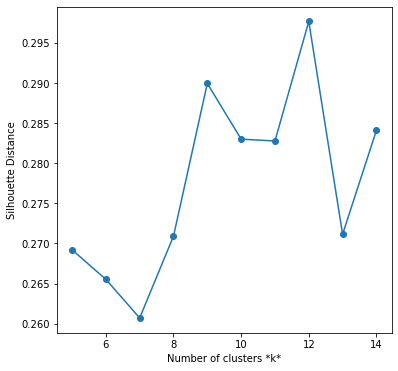

In [ ]:
silhouette(x)

The optimal number of clusters for Kmeans++ algorithm with Euclidean Distance as seen by Silhouette Score Graph is k=12

**From these experiments(Part 1 and Part 2), report which one is better and why?** <br><br>
Ans. Part 2 is better. as data is more compresses and better. 